# Important Notes

### Please refer to Section 3: "Print out evaluation results without saving to excel file"

# 1. Import Libraries

In [27]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sentence_transformers


from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer

from sklearn import linear_model,ensemble,svm, naive_bayes

from sklearn.naive_bayes import MultinomialNB

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split

from sentence_transformers import SentenceTransformer 

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

from sklearn.neighbors import KNeighborsClassifier



In [9]:
df = pd.read_csv("/Users/shanelim/Desktop/Sem 3.1/BC3409/Final Assignment - Individual/Part 1/spam (Text).csv")

In [ ]:
df

# Exploratory Data Analysis


In [37]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.isnull().values.any()

In [48]:
count_ham = df['Category'].value_counts()['ham']
count_spam = df['Category'].value_counts()['spam']

print("Number of ham messages:", count_ham)
print("Number of spam messages:", count_spam)

print("Percentage of ham messages:", count_ham/(count_ham + count_spam) * 100 )
print("Percentage of spam messages:", count_spam/(count_ham + count_spam) *100 )

Number of ham messages: 4825
Number of spam messages: 747
Percentage of ham messages: 86.59368269921033
Percentage of spam messages: 13.406317300789663


# 2. Feature Extraction and Implement Model

In [52]:
X = df["Message"]
y = df["Category"]

### a. CountVectorizer
CountVectorizer converts text into a matrix of token counts (word frequencies).

In [53]:
# CountVectorizer transforms (headlines) and transforms it into a matrix of token count (word freuqency), storing it in X_vec

from sklearn.feature_extraction.text import CountVectorizer
X_vec = CountVectorizer().fit_transform(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_vec, y)

#The matrix that results from this operation (X_vec) has a shape
#(n_samples, n_features), where:

#n_samples: Number of documents/headlines.
#n_features: Number of unique words across the entire dataset.

#(np.int32(1), np.int32(4338)) [from the output of X_vec]


In [58]:
#Logistis Regressin

model = linear_model.LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9798994974874372
[[1207    2]
 [  26  158]]


In [55]:
#Random Forest

model_RF = ensemble.RandomForestClassifier()
model_RF.fit(X_train,y_train)
y_pred = model_RF.predict(X_test)
print(accuracy_score(y_test,y_pred))

cm_rf = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test,y_pred))

0.9763101220387652
[[1209    0]
 [  33  151]]


In [56]:
#Support Vector Machines 
model= svm.SVC()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9755922469490309
[[1209    0]
 [  34  150]]


In [57]:
# Naive Bayes
model = MultinomialNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9877961234745154
[[1201    8]
 [   9  175]]


### b. Term Frequency-Inverse Document Frequency (TF-IDF)

CountVectorizer focuses purely on the count of the words in each document.
TfidfVectorizer gives more importance to words that are unique or less frequent across the corpus by adjusting the word count using the inverse document frequency.

In [59]:
X_tfidf = TfidfVectorizer().fit_transform(X)


X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y)

In [60]:
model = linear_model.LogisticRegression()
model.fit(X_train_tfidf,y_train_tfidf)
y_pred_tfidf = model.predict(X_test_tfidf)
print(accuracy_score(y_test_tfidf,y_pred_tfidf))
print(confusion_matrix(y_test_tfidf,y_pred_tfidf))

0.9619526202440776
[[1193    3]
 [  50  147]]


In [61]:
model = ensemble.RandomForestClassifier()
model.fit(X_train_tfidf,y_train)
y_pred_tfidf = model.predict(X_test_tfidf)
print(accuracy_score(y_test_tfidf,y_pred_tfidf))
print(confusion_matrix(y_test_tfidf,y_pred_tfidf))

0.8535534816941852
[[1176   20]
 [ 184   13]]


In [62]:
model = svm.SVC()
model.fit(X_train_tfidf,y_train)
y_pred_tfidf = model.predict(X_test_tfidf)
print(accuracy_score(y_test_tfidf,y_pred_tfidf))
print(confusion_matrix(y_test_tfidf,y_pred_tfidf))

0.8557071069633884
[[1192    4]
 [ 197    0]]


In [63]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train_tfidf)
y_pred_tfidf = model.predict(X_test_tfidf)
print(accuracy_score(y_test_tfidf, y_pred_tfidf))
print(confusion_matrix(y_test_tfidf,y_pred_tfidf))

0.9605168700646087
[[1196    0]
 [  55  142]]


## c. Sentence Transformer


### BERT



In [64]:
model = sentence_transformers.SentenceTransformer('bert-base-nli-mean-tokens')

#bert-base: This refers to the size of the BERT model being used. "Base" means that the model has 12 transformer layers, 768 hidden dimensions, and 12 attention heads. It's a smaller variant of BERT (as compared to "large" models).
#nli: This refers to the fact that the model has been fine-tuned on a Natural Language Inference (NLI) task, where it learned to predict the relationships between pairs of sentences (whether one entails the other, contradicts, or is neutral).
#mean-tokens: This indicates the pooling strategy used to generate the sentence embeddings. In this case, it uses mean pooling of the tokens' embeddings in a sentence. That means the embeddings of all tokens in the sentence are averaged to create a single vector (embedding) representing the entire sentence.

/Users/shanelim/opt/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [65]:
# Convert pandas Series to a list before passing it to the BERT model
X_bert = model.encode(X)  # .tolist() converts the Series to a list


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_bert, y)

In [67]:
model = linear_model.LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9849246231155779
[[1181    1]
 [  20  191]]


/Users/shanelim/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [68]:
model = ensemble.RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9691313711414213
[[1182    0]
 [  43  168]]


In [ ]:
model = svm.SVC()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

In [ ]:
model = svm.SVC()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

# 3. Print out evaluation results without saving to excel file

####  Please run the code below which will iterate thorugh the different feature extraction methods (Count Vectorizer, TFIDF and BERT) and models () and print out the evaluation results for each model (Log Regession, SVM, Naive Bayes, Random Forest, GradientBoosting and KNN)

### a. Count Vectorizer and TFIDF

In [51]:

# Load your spam dataset
df = pd.read_csv("/Users/shanelim/Desktop/Sem 3.1/BC3409/Final Assignment - Individual/Part 1/spam (Text).csv")

# Rename the columns if needed, ensure they're correct
X = df['Message']  # The text messages
y = df['Category']  # The target labels (spam/ham)

# Convert target labels from text to numerical values for classification
y = y.map({'ham': 0, 'spam': 1})  # Convert 'ham' to 0 and 'spam' to 1

# Configuration for vectorizers and models
config = {
    "vectorizers": {
        "count_vectorizer": CountVectorizer,
        "tfidf_vectorizer": TfidfVectorizer
    },
    "models": {
        "logistic_regression": linear_model.LogisticRegression,
        "svm": svm.SVC,
        "naive_bayes": naive_bayes.MultinomialNB,
        "random_forest": ensemble.RandomForestClassifier,
        "gradient_boosting": GradientBoostingClassifier,
        "knn": KNeighborsClassifier
    }
}

# Function to evaluate each combination of vectorizers and models
def evaluate_models(X, y, config):
    results = []
    for vec_name, vectorizer_cls in config['vectorizers'].items():
        vectorizer = vectorizer_cls()
        X_vec = vectorizer.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.25, random_state=42)

        for model_name, model_cls in config['models'].items():
            model = model_cls()
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            report = classification_report(y_test, y_pred, target_names=['ham', 'spam'])
            conf_matrix = confusion_matrix(y_test, y_pred)

            results.append({
                "vectorizer": vec_name,
                "model": model_name,
                "accuracy": accuracy,
                "confusion_matrix": conf_matrix,
                "classification_report": report
            })
    return results

# Run the evaluation
evaluation_results = evaluate_models(X, y, config)

# Print results
for result in evaluation_results:
    print(f"Vectorizer: {result['vectorizer']}")
    print(f"Model: {result['model']}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print("Confusion Matrix:")
    print(result['confusion_matrix'])
    print("Classification Report:")
    print(result['classification_report'])
    print("-" * 50)

Vectorizer: count_vectorizer
Model: logistic_regression
Accuracy: 0.9842
Confusion Matrix:
[[1207    0]
 [  22  164]]
Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1207
        spam       1.00      0.88      0.94       186

    accuracy                           0.98      1393
   macro avg       0.99      0.94      0.96      1393
weighted avg       0.98      0.98      0.98      1393

--------------------------------------------------
Vectorizer: count_vectorizer
Model: svm
Accuracy: 0.9785
Confusion Matrix:
[[1207    0]
 [  30  156]]
Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1207
        spam       1.00      0.84      0.91       186

    accuracy                           0.98      1393
   macro avg       0.99      0.92      0.95      1393
weighted avg       0.98      0.98      0.98      1393

-----------------------------

### b. BERT

In [ ]:
# Convert pandas Series to a list before passing it to the BERT model
X_bert = model.encode(X)  # .tolist() converts the Series to a list


In [71]:
df = pd.read_csv("/Users/shanelim/Desktop/Sem 3.1/BC3409/Final Assignment - Individual/Part 1/spam (Text).csv")

# Rename columns if needed
X = df['Message']  # The text messages
y = df['Category']  # The target labels (spam/ham)

# Convert target labels from text to numerical values for classification
y = y.map({'ham': 0, 'spam': 1})  # Convert 'ham' to 0 and 'spam' to 1

# Load the sentence transformer model
model = SentenceTransformer('bert-base-nli-mean-tokens')

# Generate BERT sentence embeddings for each message
X_embeddings = model.encode(X.tolist())

# Configuration for models
config = {
    "models": {
        "logistic_regression": linear_model.LogisticRegression,
        "svm": svm.SVC,
        "naive_bayes": naive_bayes.MultinomialNB,  # This model may not work well with embeddings
        "random_forest": ensemble.RandomForestClassifier,
        "gradient_boosting": GradientBoostingClassifier,
        "knn": KNeighborsClassifier
    }
}

# Function to evaluate models with BERT embeddings
def evaluate_models_with_bert(X_embeddings, y, config):
    X_train, X_test, y_train, y_test = train_test_split(X_embeddings, y, test_size=0.25, random_state=42)
    results = []
    for model_name, model_cls in config['models'].items():
        try:
            model = model_cls()
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            report = classification_report(y_test, y_pred, target_names=['ham', 'spam'])
            conf_matrix = confusion_matrix(y_test, y_pred)

            results.append({
                "model": model_name,
                "accuracy": accuracy,
                "confusion_matrix": conf_matrix,
                "classification_report": report
            })
        except Exception as e:
            print(f"Model {model_name} encountered an error: {e}")
    return results

# Run the evaluation
evaluation_results_bert = evaluate_models_with_bert(X_embeddings, y, config)

# Print results
for result in evaluation_results_bert:
    print(f"Model: {result['model']}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print("Confusion Matrix:")
    print(result['confusion_matrix'])
    print("Classification Report:")
    print(result['classification_report'])
    print("-" * 50)

/Users/shanelim/opt/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/Users/shanelim/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model naive_bayes encountered an error: Negative values in data passed to MultinomialNB (input X)
Model: logistic_regression
Accuracy: 0.9907
Confusion Matrix:
[[1203    4]
 [   9  177]]
Classification Report:
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1207
        spam       0.98      0.95      0.96       186

    accuracy                           0.99      1393
   macro avg       0.99      0.97      0.98      1393
weighted avg       0.99      0.99      0.99      1393

--------------------------------------------------
Model: svm
Accuracy: 0.9878
Confusion Matrix:
[[1206    1]
 [  16  170]]
Classification Report:
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1207
        spam       0.99      0.91      0.95       186

    accuracy                           0.99      1393
   macro avg       0.99      0.96      0.97      1393
weighted avg       0.99      0.99      0.99 

### Print out Test F1 Score


In [43]:
from sklearn.metrics import f1_score

def evaluate_models(X, y, config):
    results = []
    for vec_name, vectorizer_cls in config['vectorizers'].items():
        vectorizer = vectorizer_cls()
        X_vec = vectorizer.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.25, random_state=42)

        for model_name, model_cls in config['models'].items():
            model = model_cls()
            model.fit(X_train, y_train)
            
            # Predictions on the training and test sets
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)
            
            # Calculate F1 score for training and test sets
            train_f1 = f1_score(y_train, y_train_pred)
            test_f1 = f1_score(y_test, y_test_pred)
            
            # Generate classification report and confusion matrix for test set
            test_report = classification_report(y_test, y_test_pred, target_names=['ham', 'spam'])
            test_conf_matrix = confusion_matrix(y_test, y_test_pred)

            # Performance gap between training and test F1 scores
            f1_gap = train_f1 - test_f1  # Large gap indicates potential overfitting
            
            results.append({
                "vectorizer": vec_name,
                "model": model_name,
                "train_f1": train_f1,
                "test_f1": test_f1,
                "f1_gap": f1_gap,
                "confusion_matrix": test_conf_matrix,
                "classification_report": test_report
            })
    return results

# Run the evaluation
evaluation_results = evaluate_models(X, y, config)

# Print results with F1 score analysis
for result in evaluation_results:
    print(f"Vectorizer: {result['vectorizer']}")
    print(f"Model: {result['model']}")
    print(f"Training F1 Score: {result['train_f1']:.4f}")
    print(f"Test F1 Score: {result['test_f1']:.4f}")
    print(f"F1 Gap (Train-Test): {result['f1_gap']:.4f}")
    print("Confusion Matrix:")
    print(result['confusion_matrix'])
    print("Classification Report:")
    print(result['classification_report'])
    print("-" * 50)


Vectorizer: count_vectorizer
Model: logistic_regression
Training F1 Score: 0.9928
Test F1 Score: 0.9371
F1 Gap (Train-Test): 0.0557
Confusion Matrix:
[[1207    0]
 [  22  164]]
Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1207
        spam       1.00      0.88      0.94       186

    accuracy                           0.98      1393
   macro avg       0.99      0.94      0.96      1393
weighted avg       0.98      0.98      0.98      1393

--------------------------------------------------
Vectorizer: count_vectorizer
Model: svm
Training F1 Score: 0.9855
Test F1 Score: 0.9123
F1 Gap (Train-Test): 0.0733
Confusion Matrix:
[[1207    0]
 [  30  156]]
Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1207
        spam       1.00      0.84      0.91       186

    accuracy                           0.98      1393
   macro avg       0

## 4. Code to generate Excel table to compare results

## a. Code to generate Excel table to compare results for CountVectorizer and TFIDF only

Please change "output_path" below

In [ ]:
# Load your spam dataset
df = pd.read_csv("/Users/shanelim/Desktop/Sem 3.1/BC3409/Final Assignment - Individual/Part 1/spam (Text).csv")

# Rename the columns if needed, ensure they're correct
X = df['Message']  # The text messages
y = df['Category']  # The target labels (spam/ham)

# Convert target labels from text to numerical values for classification
y = y.map({'ham': 0, 'spam': 1})  # Convert 'ham' to 0 and 'spam' to 1

# Configuration for vectorizers and models
config = {
    "vectorizers": {
        "count_vectorizer": CountVectorizer,
        "tfidf_vectorizer": TfidfVectorizer,
    },
    "models": {
        "logistic_regression": linear_model.LogisticRegression,
        "svm": svm.SVC,
        "naive_bayes": naive_bayes.MultinomialNB,
        "random_forest": ensemble.RandomForestClassifier,
        "gradient_boosting": GradientBoostingClassifier,
        "knn": KNeighborsClassifier
    }
}

# BERT model instance outside the loop
bert_model = SentenceTransformer('bert-base-nli-mean-tokens')

# Function to evaluate each combination of vectorizers and models
def evaluate_models(X, y, config):
    results = []
    plt.figure(figsize=(10, 8))  # For ROC curves

    for vec_name, vectorizer_cls in config['vectorizers'].items():
        vectorizer = vectorizer_cls()
        X_vec = vectorizer.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.25, random_state=42)

        for model_name, model_cls in config['models'].items():
            model = model_cls()
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

            # Calculate ROC and AUC
            fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
            auc_score = roc_auc_score(y_test, y_pred_prob)

            # Add results to the list
            results.append({
                "vectorizer": vec_name,
                "model": model_name,
                "accuracy": accuracy_score(y_test, y_pred),
                "precision": precision_score(y_test, y_pred),
                "recall": recall_score(y_test, y_pred),
                "f1_score": f1_score(y_test, y_pred),
                "roc_auc": auc_score,
                "confusion_matrix": confusion_matrix(y_test, y_pred)
            })

            # Plot ROC curve
            plt.plot(fpr, tpr, label=f'{vec_name} + {model_name} (AUC = {auc_score:.2f})')


    # Plot formatting
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    return pd.DataFrame(results)


# Run the evaluation
evaluation_df = evaluate_models(X, y, config)

# Save the results to an Excel file using xlsxwriter instead of openpyxl
output_path = '/Users/shanelim/Desktop/Sem 3.1/BC3409/Final Assignment - Individual/evaluation_comparison_output.xlsx'
evaluation_df.to_excel(output_path, index=False, engine='xlsxwriter')

# Print the path to the Excel file
print(f"Results have been saved to {output_path}")


## b. Code to generate Excel table to compare results for BERT

Please change "output_path" variable below

/Users/shanelim/opt/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Evaluating BERT...


/Users/shanelim/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


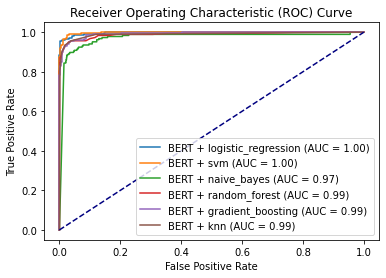

Results have been saved to /Users/shanelim/Desktop/Sem 3.1/BC3409/Final Assignment - Individual/BERT_evaluation_comparison_output.xlsx


In [36]:
X = df['Message']  # The text messages
y = df['Category']  # The target labels (spam/ham)

# Convert target labels from text to numerical values for classification
y = y.map({'ham': 0, 'spam': 1})  # Convert 'ham' to 0 and 'spam' to 1

# Initialize BERT model
bert_model = SentenceTransformer('bert-base-nli-mean-tokens')

# Encode messages using BERT embeddings
print("Evaluating BERT...")
X_bert = bert_model.encode(X.to_list(), batch_size=16)  # Convert text to embeddings
X_train_bert, X_test_bert, y_train, y_test = train_test_split(X_bert, y, test_size=0.25, random_state=42)

# Define models (as per your config)
from sklearn import linear_model, svm, naive_bayes, ensemble

config = {
    "models": {
        "logistic_regression": linear_model.LogisticRegression,
        "svm": svm.SVC,
        "naive_bayes": naive_bayes.GaussianNB,  # Use GaussianNB instead of MultinomialNB for BERT
        "random_forest": ensemble.RandomForestClassifier,
        "gradient_boosting": GradientBoostingClassifier,
        "knn": KNeighborsClassifier
    }
}

# To store results
results = []

# Loop through the models and evaluate
for model_name, model_cls in config['models'].items():
    model = model_cls()
    model.fit(X_train_bert, y_train)
    y_pred = model.predict(X_test_bert)
    
    # Handle probability prediction for models that support it
    y_pred_prob = model.predict_proba(X_test_bert)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test_bert)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred_prob)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Store results for this model
    results.append({
        "model": model_name,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "roc_auc": auc_score,
        "confusion_matrix": conf_matrix
    })

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f'BERT + {model_name} (AUC = {auc_score:.2f})')

# Plot ROC curve
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Convert results to a DataFrame
evaluation_df = pd.DataFrame(results)

# Save the results to an Excel file using xlsxwriter
output_path = '/Users/shanelim/Desktop/Sem 3.1/BC3409/Final Assignment - Individual/BERT_evaluation_comparison_output.xlsx'
evaluation_df.to_excel(output_path, index=False, engine='xlsxwriter')

# Print the path to the Excel file
print(f"Results have been saved to {output_path}")

# Seperate Vectorizer into TFIDF and Count Vectorizer (Used to generate ROC only)
 

#### TFIDF

/Users/shanelim/opt/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


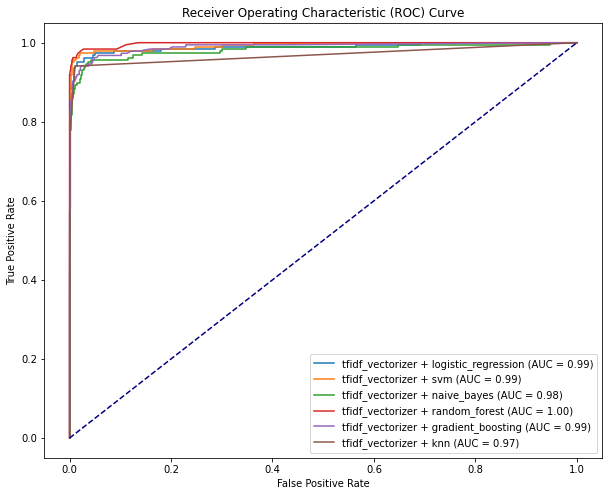

Results have been saved to /Users/shanelim/Desktop/Sem 3.1/BC3409/Final Assignment - Individual/evaluation_comparison_output.xlsx


In [50]:
# Load your spam dataset
df = pd.read_csv("/Users/shanelim/Desktop/Sem 3.1/BC3409/Final Assignment - Individual/Part 1/spam (Text).csv")

# Rename the columns if needed, ensure they're correct
X = df['Message']  # The text messages
y = df['Category']  # The target labels (spam/ham)

# Convert target labels from text to numerical values for classification
y = y.map({'ham': 0, 'spam': 1})  # Convert 'ham' to 0 and 'spam' to 1

# Configuration for vectorizers and models
config = {
    "vectorizers": {
        "tfidf_vectorizer": TfidfVectorizer,
    },
    "models": {
        "logistic_regression": linear_model.LogisticRegression,
        "svm": svm.SVC,
        "naive_bayes": naive_bayes.MultinomialNB,
        "random_forest": ensemble.RandomForestClassifier,
        "gradient_boosting": GradientBoostingClassifier,
        "knn": KNeighborsClassifier
    }
}

# BERT model instance outside the loop
bert_model = SentenceTransformer('bert-base-nli-mean-tokens')

# Function to evaluate each combination of vectorizers and models
def evaluate_models(X, y, config):
    results = []
    plt.figure(figsize=(10, 8))  # For ROC curves

    for vec_name, vectorizer_cls in config['vectorizers'].items():
        vectorizer = vectorizer_cls()
        X_vec = vectorizer.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.25, random_state=42)

        for model_name, model_cls in config['models'].items():
            model = model_cls()
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

            # Calculate ROC and AUC
            fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
            auc_score = roc_auc_score(y_test, y_pred_prob)

            # Add results to the list
            results.append({
                "vectorizer": vec_name,
                "model": model_name,
                "accuracy": accuracy_score(y_test, y_pred),
                "precision": precision_score(y_test, y_pred),
                "recall": recall_score(y_test, y_pred),
                "f1_score": f1_score(y_test, y_pred),
                "roc_auc": auc_score,
                "confusion_matrix": confusion_matrix(y_test, y_pred)
            })

            # Plot ROC curve
            plt.plot(fpr, tpr, label=f'{vec_name} + {model_name} (AUC = {auc_score:.2f})')


    # Plot formatting
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    return pd.DataFrame(results)


# Run the evaluation
evaluation_df = evaluate_models(X, y, config)

# Save the results to an Excel file using xlsxwriter instead of openpyxl
#output_path = '/Users/shanelim/Desktop/Sem 3.1/BC3409/Final Assignment - Individual/evaluation_comparison_output.xlsx'
evaluation_df.to_excel(output_path, index=False, engine='xlsxwriter')

# Print the path to the Excel file
print(f"Results have been saved to {output_path}")


#### CountVectorizer

/Users/shanelim/opt/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


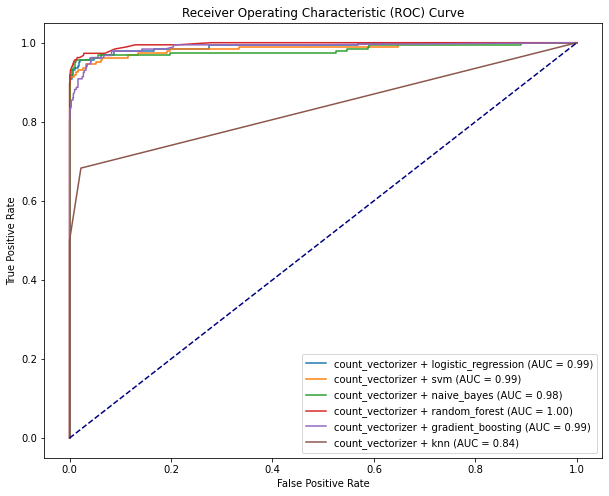

Results have been saved to /Users/shanelim/Desktop/Sem 3.1/BC3409/Final Assignment - Individual/evaluation_comparison_output.xlsx


In [49]:
# Load your spam dataset
df = pd.read_csv("/Users/shanelim/Desktop/Sem 3.1/BC3409/Final Assignment - Individual/Part 1/spam (Text).csv")

# Rename the columns if needed, ensure they're correct
X = df['Message']  # The text messages
y = df['Category']  # The target labels (spam/ham)

# Convert target labels from text to numerical values for classification
y = y.map({'ham': 0, 'spam': 1})  # Convert 'ham' to 0 and 'spam' to 1

# Configuration for vectorizers and models
config = {
    "vectorizers": {
        "count_vectorizer": CountVectorizer,
    },
    "models": {
        "logistic_regression": linear_model.LogisticRegression,
        "svm": svm.SVC,
        "naive_bayes": naive_bayes.MultinomialNB,
        "random_forest": ensemble.RandomForestClassifier,
        "gradient_boosting": GradientBoostingClassifier,
        "knn": KNeighborsClassifier
    }
}

# BERT model instance outside the loop
bert_model = SentenceTransformer('bert-base-nli-mean-tokens')

# Function to evaluate each combination of vectorizers and models
def evaluate_models(X, y, config):
    results = []
    plt.figure(figsize=(10, 8))  # For ROC curves

    for vec_name, vectorizer_cls in config['vectorizers'].items():
        vectorizer = vectorizer_cls()
        X_vec = vectorizer.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.25, random_state=42)

        for model_name, model_cls in config['models'].items():
            model = model_cls()
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

            # Calculate ROC and AUC
            fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
            auc_score = roc_auc_score(y_test, y_pred_prob)

            # Add results to the list
            results.append({
                "vectorizer": vec_name,
                "model": model_name,
                "accuracy": accuracy_score(y_test, y_pred),
                "precision": precision_score(y_test, y_pred),
                "recall": recall_score(y_test, y_pred),
                "f1_score": f1_score(y_test, y_pred),
                "roc_auc": auc_score,
                "confusion_matrix": confusion_matrix(y_test, y_pred)
            })

            # Plot ROC curve
            plt.plot(fpr, tpr, label=f'{vec_name} + {model_name} (AUC = {auc_score:.2f})')


    # Plot formatting
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    return pd.DataFrame(results)


# Run the evaluation
evaluation_df = evaluate_models(X, y, config)

# Save the results to an Excel file using xlsxwriter instead of openpyxl
output_path = '/Users/shanelim/Desktop/Sem 3.1/BC3409/Final Assignment - Individual/evaluation_comparison_output.xlsx'
evaluation_df.to_excel(output_path, index=False, engine='xlsxwriter')

# Print the path to the Excel file
print(f"Results have been saved to {output_path}")
